In [2]:
import json 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import time
start_time = time.time()
import spacy
# Makes sure we're the correct directory
os.chdir('/Users/pkim/Dropbox/Projects/Airbnb_NLP')



In [3]:
LA_reviews = pd.read_csv("data/reviews_LA_7_8.csv")
SF_reviews = pd.read_csv("data/reviews_SF_7_8.csv")
LA_hosting = pd.read_csv("data/LA_nlp_ds.csv")
SF_hosting = pd.read_csv("data/SF_nlp_ds.csv")


In [4]:
LA_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin & Christi,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,344,79805581,2016-06-14,2089550,Drew & Katie,We really enjoyed our stay here in Burbank! Th...
3,344,120725697,2016-12-11,32602867,Christopher,I had a ton of fun learning to play Go with Fu...
4,344,123800867,2016-12-30,35822259,May,The host canceled this reservation the day bef...


In [5]:
SF_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [6]:
LA_hosting.head()


,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.
1,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,NaN,NaN,NaN,NaN,NaN,ABOUT YOU. Friendly travelers or people comin...,I have been teaching yoga and meditation for 3...,2732,3041,Yoga Priestess
2,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to live in paradise? We have a ver...,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You can hang out in our garden or on the sun d...,Helene is managing our Home while we are in Ge...,- Please agree to the following house rules ...,we are loving our home and would like to share...,5728,9171,Sanni
3,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to stay in paradise? We are close ...,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You can spend time in our garden or on the sun...,Helene is managing The Circle while we are in ...,- Please agree to the following house rules ...,we are loving our home and would like to share...,5729,9171,Sanni
4,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise? Our one-of-a-...,"Our home, “THE CIRCLE” is known to the local L...",Do you want a taste of Paradise? Our one-of-a-...,Our neighborhood is very quiet and save. There...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You will have the main house to yourself inclu...,Helene is managing our Home while we are in Ge...,- Please agree to the following house rules ...,we are loving our home and would like to share...,5843,9171,Sanni


In [7]:
SF_hosting.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
1,Charming room for two,Your own private room plus access to a shared ...,"This is the first room I rented on Airbnb, sta...",Your own private room plus access to a shared ...,"This is a quiet, safe neighborhood on a substa...",Here is the complete list of House Rules you a...,Public transit service to my house is outstand...,"During the hours of 7:00 to 22:00, your access...","I live at the house in my own bedroom, and I w...",These House Rules have money associated with t...,I am a retired software entrepreneur now raisi...,3850,4921,Kevin
2,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...","Your sunny room looks out over a lush garden, ...","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,"We live in a dense, urban neighborhood, and ou...",It's an easy and enjoyable 10 minute stroll to...,You'll have your own bedroom and private bathr...,"We are experienced Airbnb hosts, and have had ...","PLEASE: Read through our entire listing, as we...",Ivan is a publisher of a book for 4 year olds....,8739,7149,Ivan & Wendy
3,Artful Potrero Separate Floor with Garden,A Unique Guest Suite! A Spacious Art Filled ...,"It is unique, very spacious [800 sq. ft. with...",A Unique Guest Suite! A Spacious Art Filled ...,"It is a distinct neighborhood, with easy acces...",NaN,There are buses within a block to connect to a...,"Laundry privileges, Spacious Garden with City ...",We are available to make suggestions to enhanc...,We are respectful of the privacy of our renter...,The apartment is on the ground floor of the ho...,9225,29674,Gae
4,Victorian Suite in Inner Mission,NaN,Please read this before you book! Second floor...,Please read this before you book! Second floor...,"Neighborhood is safe, sunny, lively and fun. ...",San Francisco Office of Short-Term Rentals Bus...,"SF Muni line 12, bus stop is a block away from...",You are welcome to relax and enjoy our backyar...,Feel free to knock on the downstairs door if y...,Basic rules: No smoking inside the suite or on...,Coming from SF.,10251,35199,Roman & Sarah


In [8]:
LA_reviews[LA_reviews['comments'].isna()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
428,5729,328280107,2018-09-25,204357260,旻昇,NaN
557,5843,411237998,2019-02-11,236066168,Wigle,NaN
8668,46858,190727072,2017-09-04,26652389,Ray,NaN
19831,107970,233045636,2018-02-07,169974814,Leticia,NaN
19909,107970,312544617,2018-08-23,209796903,Dong,NaN
19934,107970,338492682,2018-10-19,318769,Jeremy,NaN
27317,212036,277592939,2018-06-16,195309482,Laura,NaN
28327,218672,275375552,2018-06-10,20029893,Stephanie,NaN
29767,237988,286217988,2018-07-05,197324233,Hatun,NaN
30045,240623,156137212,2017-05-29,3769694,David,NaN


In [9]:
SF_reviews[SF_reviews['comments'].isna()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
8842,57676,463163549,2019-06-02,800095,Gernot,NaN
10425,63405,369208104,2019-01-09,64031749,Conor,NaN
31012,377569,404349422,2019-01-23,233758492,Branden,NaN
32403,423063,338134411,2018-10-18,25368593,Veronica,NaN
47988,719431,233055588,2018-02-07,166605374,Otto,NaN
68390,1206184,154689490,2017-05-25,131728793,Werner,NaN
79000,1493659,271588144,2018-06-01,78863699,Ian,NaN
81551,1578597,126815689,2017-01-14,10662931,Brendan,NaN
83412,1633173,255184473,2018-04-19,179631927,Alex,NaN
84310,1671260,469499114,2019-06-14,247262161,지선,NaN


In [10]:
random_index = np.random.choice(len(LA_reviews),10000, replace = False)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([2.000e+00, 1.300e+01, 2.700e+01, 1.010e+02, 2.180e+02, 4.850e+02,
        9.120e+02, 1.669e+03, 2.600e+03, 3.973e+03]),
 array([733786. , 734132.2, 734478.4, 734824.6, 735170.8, 735517. ,
        735863.2, 736209.4, 736555.6, 736901.8, 737248. ]),
 <a list of 10 Patch objects>)

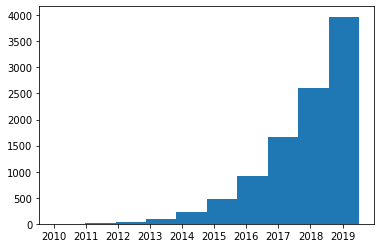

In [11]:
plt.hist(pd.to_datetime(LA_reviews.loc[random_index]['date']))

In [12]:
random_index = np.random.choice(len(SF_reviews),10000, replace = False)

(array([  13.,   51.,  101.,  208.,  470.,  781., 1235., 1823., 2334.,
        2984.]),
 array([733796. , 734141.1, 734486.2, 734831.3, 735176.4, 735521.5,
        735866.6, 736211.7, 736556.8, 736901.9, 737247. ]),
 <a list of 10 Patch objects>)

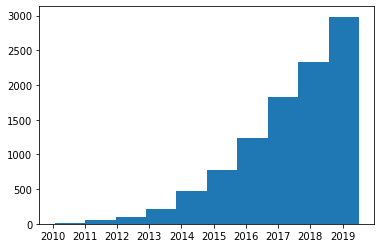

In [13]:
plt.hist(pd.to_datetime(SF_reviews.loc[random_index]['date']))

(array([8.447e+03, 1.245e+03, 2.120e+02, 4.700e+01, 1.900e+01, 9.000e+00,
        9.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 4.2840e+02, 8.5580e+02, 1.2832e+03, 1.7106e+03,
        2.1380e+03, 2.5654e+03, 2.9928e+03, 3.4202e+03, 3.8476e+03,
        4.2750e+03]),
 <a list of 10 Patch objects>)

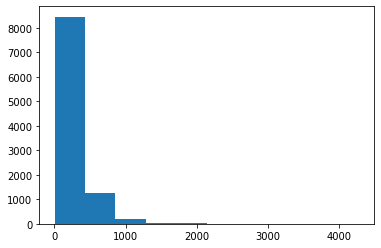

In [14]:
random_index = np.random.choice(len(LA_reviews),10000, replace = False)
plt.hist(LA_reviews.loc[random_index].dropna(0)['comments'].apply(len))

(array([7.307e+03, 2.129e+03, 4.040e+02, 1.090e+02, 2.300e+01, 1.800e+01,
        3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e+00, 3.640e+02, 7.270e+02, 1.090e+03, 1.453e+03, 1.816e+03,
        2.179e+03, 2.542e+03, 2.905e+03, 3.268e+03, 3.631e+03]),
 <a list of 10 Patch objects>)

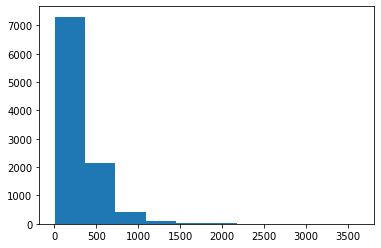

In [15]:
random_index = np.random.choice(len(SF_reviews),10000, replace = False)
plt.hist(SF_reviews.loc[random_index].dropna(0)['comments'].apply(len))

(array([6.898e+03, 2.171e+03, 5.690e+02, 1.980e+02, 7.400e+01, 4.700e+01,
        1.800e+01, 7.000e+00, 5.000e+00, 5.000e+00]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. ]),
 <a list of 10 Patch objects>)

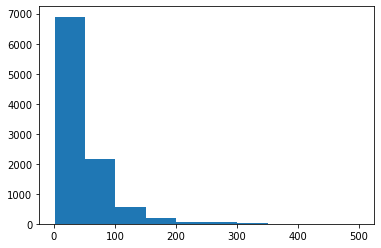

In [16]:
random_index = np.random.choice(len(LA_reviews),10000, replace = False)
plt.hist(LA_reviews.loc[random_index].dropna(0)['comments'].apply(lambda x: len(x.split(" "))))

(array([6.401e+03, 2.560e+03, 6.860e+02, 2.050e+02, 7.400e+01, 3.400e+01,
        1.500e+01, 9.000e+00, 3.000e+00, 1.000e+01]),
 array([  1. ,  52.3, 103.6, 154.9, 206.2, 257.5, 308.8, 360.1, 411.4,
        462.7, 514. ]),
 <a list of 10 Patch objects>)

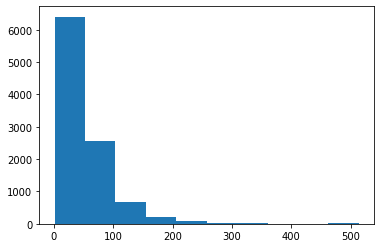

In [17]:
random_index = np.random.choice(len(SF_reviews),10000, replace = False)
plt.hist(SF_reviews.loc[random_index].dropna(0)['comments'].apply(lambda x: len(x.split(" "))))

In [18]:
len(LA_reviews['listing_id'].unique())

35959

In [19]:
len(LA_hosting['id'].unique())

13328

In [20]:
len(LA_reviews.drop("id",1).merge(LA_hosting,
                 how = "inner",left_on="listing_id",
                 right_on="id")['id'].unique())

12589

In [21]:
len(SF_reviews['listing_id'].unique())

6164

In [22]:
len(SF_hosting['id'].unique())

3168

In [24]:
len(SF_reviews.drop("id",1).merge(SF_hosting,
                 how = "inner",left_on="listing_id",
                 right_on="id")['id'].unique())

2877

In [25]:
random_index = np.random.choice(len(LA_reviews),10000, replace = False)
sample_LA = LA_reviews.loc[random_index]
random_index = np.random.choice(len(SF_reviews),10000, replace = False)
sample_SF = SF_reviews.loc[random_index]


In [26]:
sample_LA.to_csv("data/LA_review_sample.csv",index=False)
sample_SF.to_csv("data/SF_review_sample.csv",index=False)

In [152]:
import re 
columns = ['name','summary','space','description','neighborhood_overview',
          'notes','transit','access','interaction','house_rules',
           'host_about']

In [153]:
for col in columns: 
    LA_hosting[col] = LA_hosting[col].apply(lambda x: 
                                re.sub('[^A-Za-z0-9]+',' ',str(x))
                               )
    SF_hosting[col] = SF_hosting[col].apply(lambda x: 
                                re.sub('[^A-Za-z0-9]+',' ',str(x))
                               )

In [154]:
LA_hosting.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,Fireplace Mirrored Mini Suit Website hidden by...,Our best memory foam pillows you ll ever sleep...,Flickering fireplace Blendtec Designer 625 Ble...,Our best memory foam pillows you ll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays Blendtec Designer 6...,There are many buses bus stops going in every ...,Kitchen with new refrigerator dishwasher stove...,I am friendly and available to help you with y...,I just have one rule The Golden Rule Do unto o...,Writer Literary Manager Photographer Producing...,2708,3008,Chas.
1,Zen Life at the Beach,nan,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,nan,nan,nan,nan,nan,ABOUT YOU Friendly travelers or people coming ...,I have been teaching yoga and meditation for 3...,2732,3041,Yoga Priestess
2,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to live in paradise We have a very...,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save There ...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You can hang out in our garden or on the sun d...,Helene is managing our Home while we are in Ge...,Please agree to the following house rules Imp...,we are loving our home and would like to share...,5728,9171,Sanni
3,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to stay in paradise We are close t...,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save There ...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You can spend time in our garden or on the sun...,Helene is managing The Circle while we are in ...,Please agree to the following house rules Imp...,we are loving our home and would like to share...,5729,9171,Sanni
4,Artist Oasis near Venice Beach w Beautiful Garden,Do you want a taste of Paradise Our one of a k...,Our home THE CIRCLE is known to the local LA a...,Do you want a taste of Paradise Our one of a k...,Our neighborhood is very quiet and save There ...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You will have the main house to yourself inclu...,Helene is managing our Home while we are in Ge...,Please agree to the following house rules Imp...,we are loving our home and would like to share...,5843,9171,Sanni


In [179]:

nlp = spacy.load("en")
prefix_re = nlp.Defaults.prefixes
suffix_re = nlp.Defaults.suffixes


tokenizer = spacy.tokenizer.Tokenizer(nlp.vocab,prefix_search=prefix_re,
                                     suffix_search = suffix_re)

In [193]:
doc = LA_hosting.iloc[0:2]['summary'].apply(nlp)

In [194]:
print([t.text.lower() for t in doc])

['our best memory foam pillows you ll ever sleep on first morning starbuck s peet s coffee latte style coffee also protein bars granola bars and a fresh baked swedish cinnamon roll continental breakfast as well as breakfast requests a welcome bottle of voss artesian water from norway terry robe slippers handmade amish wildflower soap candy bowl trail mix jar socal beaches walk of fame clubs then back here for r r pamper yourself in west hollywood california ', 'nan']


In [197]:
print([t.count_by(spacy.attrs.ORTH) for t in doc])

[{3423896937904315402: 1, 12956416454023936912: 2, 3197928453018144401: 2, 14746575309964218387: 1, 11551296348542993813: 1, 13465932904787106072: 1, 13464593006667652248: 1, 7924123946469092124: 1, 10124888097481442975: 1, 10576836328028401825: 1, 9573608056868193186: 1, 2601794860362077987: 1, 6231102377460051108: 1, 10852253267983130536: 1, 7831658034963690409: 1, 14086895032174011562: 1, 11901859001352538922: 1, 16068179655637472171: 1, 3636093925232013737: 1, 11923606697255677998: 1, 9076447211260183728: 2, 12038636986491964081: 1, 3068594429046053170: 1, 18369780306023727283: 1, 6364796392168805685: 1, 5640369432778651323: 1, 16337536289976144572: 2, 16978132545290669629: 2, 886050111519832510: 2, 13945710435765108030: 1, 13663969602042931649: 1, 3850206133927410371: 1, 1826022581302100295: 1, 3109722610398367559: 1, 11242046901407865673: 1, 1945170294730254411: 1, 14862748245026736845: 1, 12900660821775525459: 1, 2283656566040971221: 1, 8583198014058800214: 1, 450063815469644654

In [203]:
for docs in doc:
    for entity in docs.noun_chunks:
        print(entity.text," | ",entity.lemma_)

Our best memory foam  |  -PRON- good memory foam
you  |  -PRON-
First Morning  |  First Morning
Starbuck  |  Starbuck
Peet s coffee latte style coffee  |  Peet s coffee latte style coffee
granola bars  |  granola bar
a fresh baked Swedish cinnamon  |  a fresh baked swedish cinnamon
roll  |  roll
continental breakfast  |  continental breakfast
A welcome bottle  |  a welcome bottle
Voss artesian water  |  Voss artesian water
Norway Terry robe slippers  |  Norway Terry robe slipper
Amish wildflower soap Candy bowl trail mix jar SoCal beaches  |  Amish wildflower soap Candy bowl trail mix jar socal beach
Fame clubs  |  Fame club
R R Pamper  |  r R pamper
yourself  |  -PRON-
West Hollywood California  |  West Hollywood California
nan  |  nan


In [87]:
LA_merge = LA_reviews.drop("id",1).merge(LA_hosting,
                 how = "inner",left_on="listing_id",
                 right_on="id")

In [88]:
SF_merge = SF_reviews.drop("id",1).merge(SF_hosting,
                 how = "inner",left_on="listing_id",
                 right_on="id")

In [92]:
LA_merge.head()

,listing_id,date,reviewer_id,reviewer_name,comments,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,2708,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.
1,2708,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.
2,2708,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.
3,2708,2016-02-01,33226412,Haroon,Charles is a most wonderful host. I enjoyed my...,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.
4,2708,2016-03-20,23408691,Massimo Litterio,Chas is a really good host. He gives me a lot ...,Fireplace Mirrored Mini Suit (Website hidden b...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\nLiterary Manager.\r\nPhotographer.\...,2708,3008,Chas.


In [93]:
SF_merge.head()

,listing_id,date,reviewer_id,reviewer_name,comments,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,958,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...","Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
1,958,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
2,958,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
3,958,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
4,958,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,We are a family with 2 boys born in 2009 and 2...,958,1169,Holly
